<IPython.core.display.Javascript object>


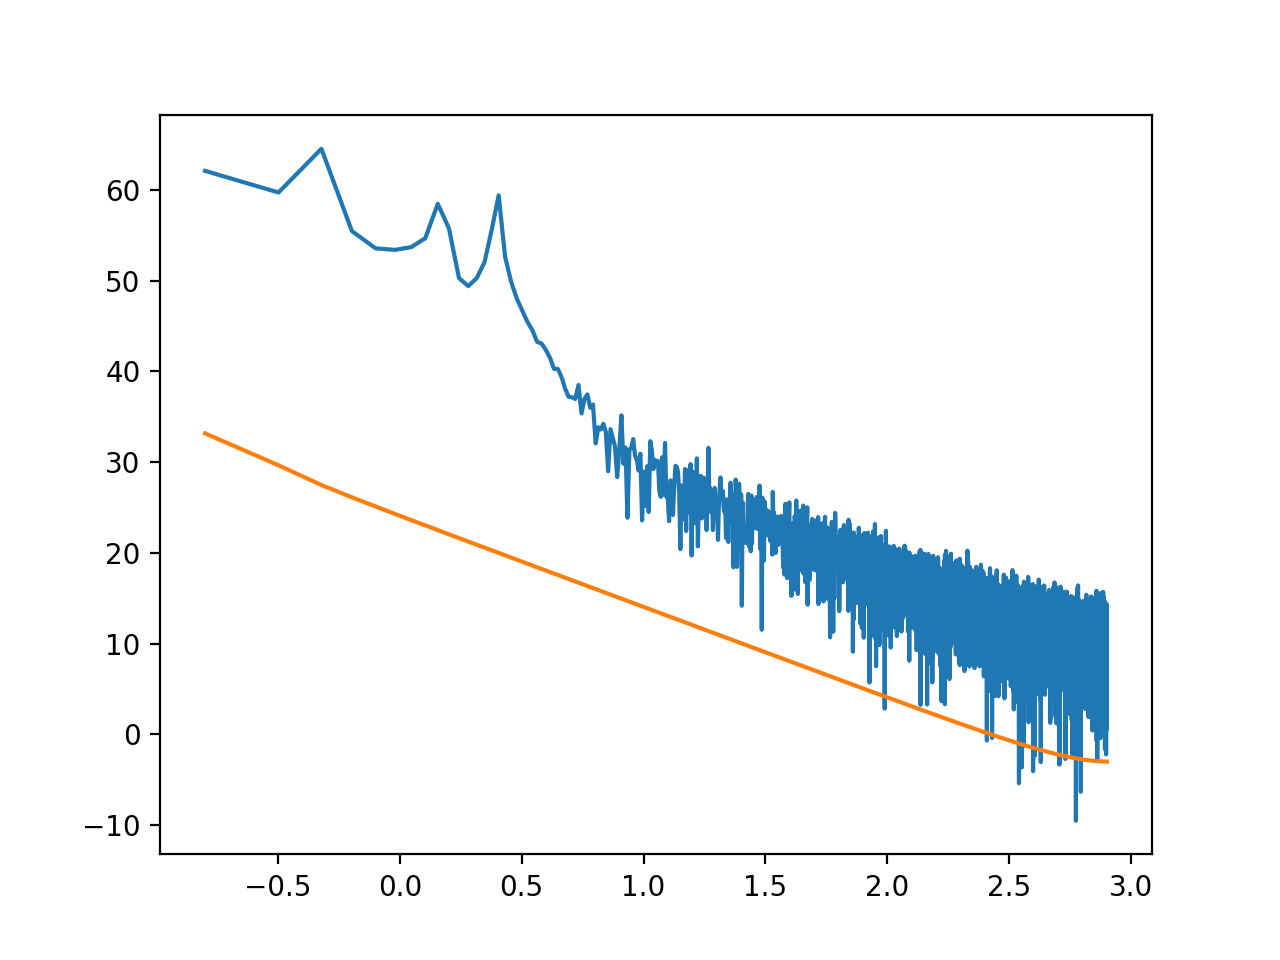

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: divide by zero encountered in log10
/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in log10
/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: divide by zero encountered in log10
/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10


<IPython.core.display.Javascript object>


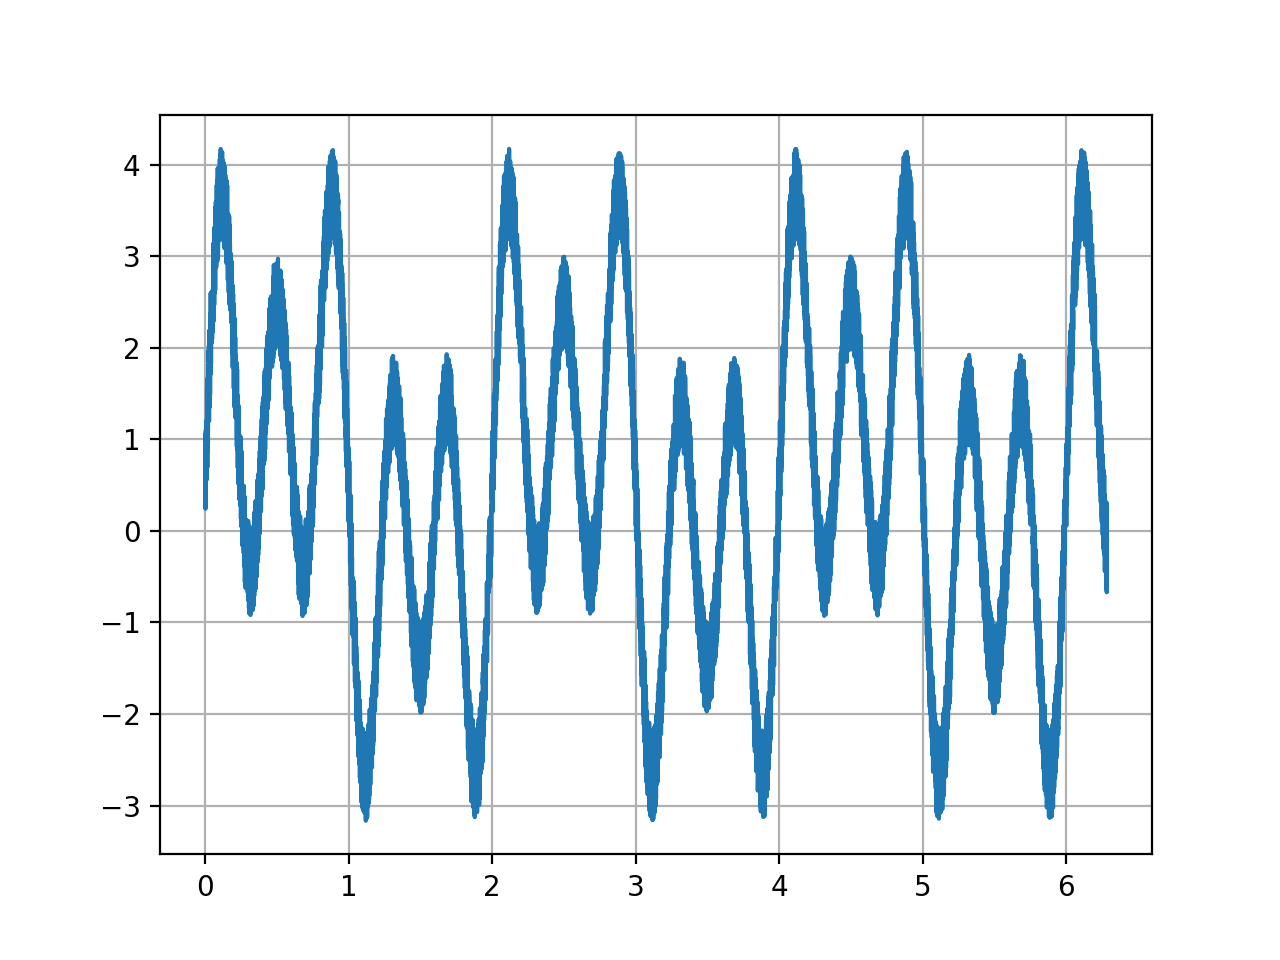

<IPython.core.display.Javascript object>


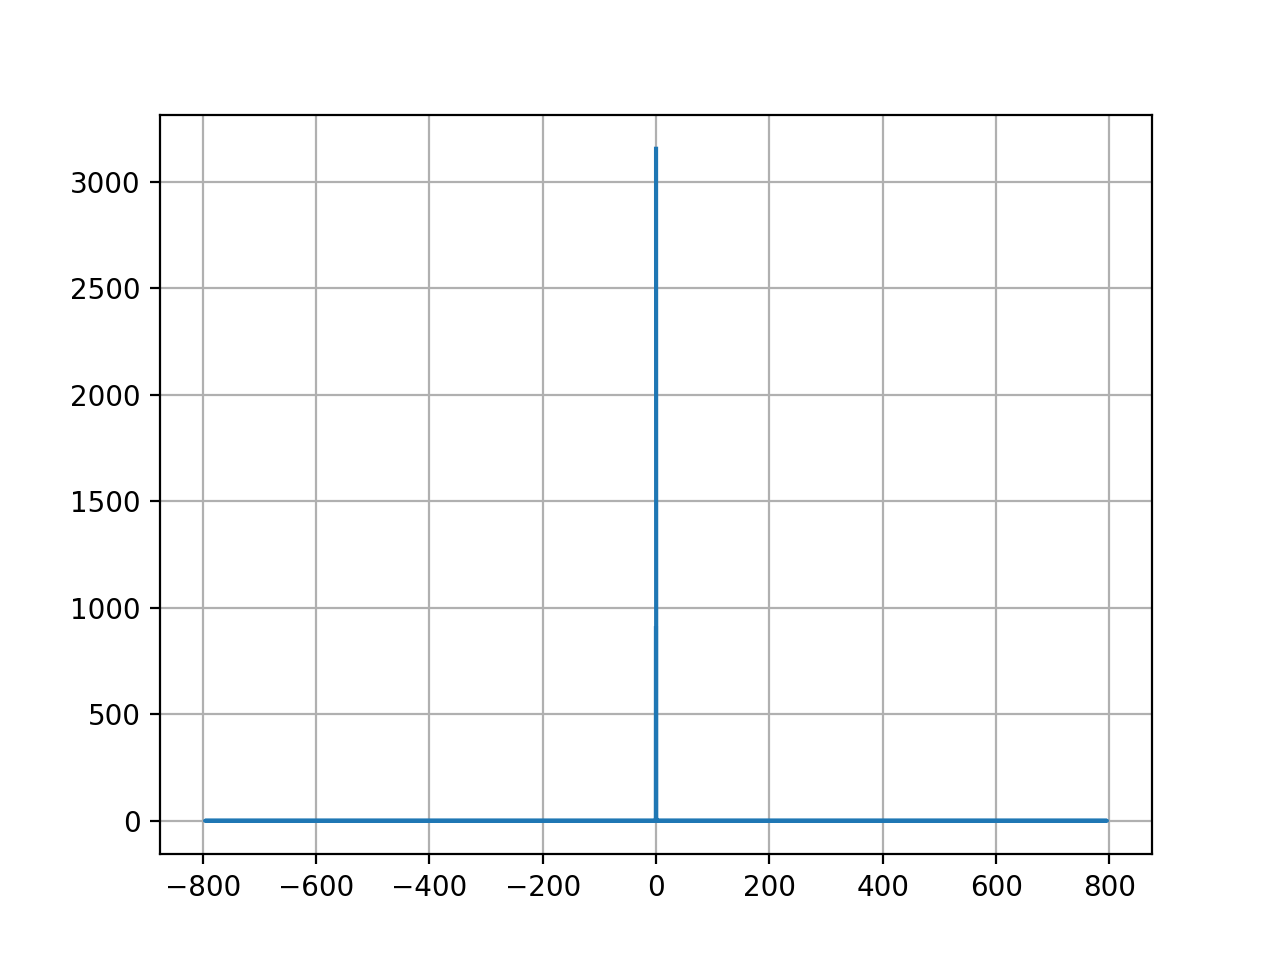

<IPython.core.display.Javascript object>


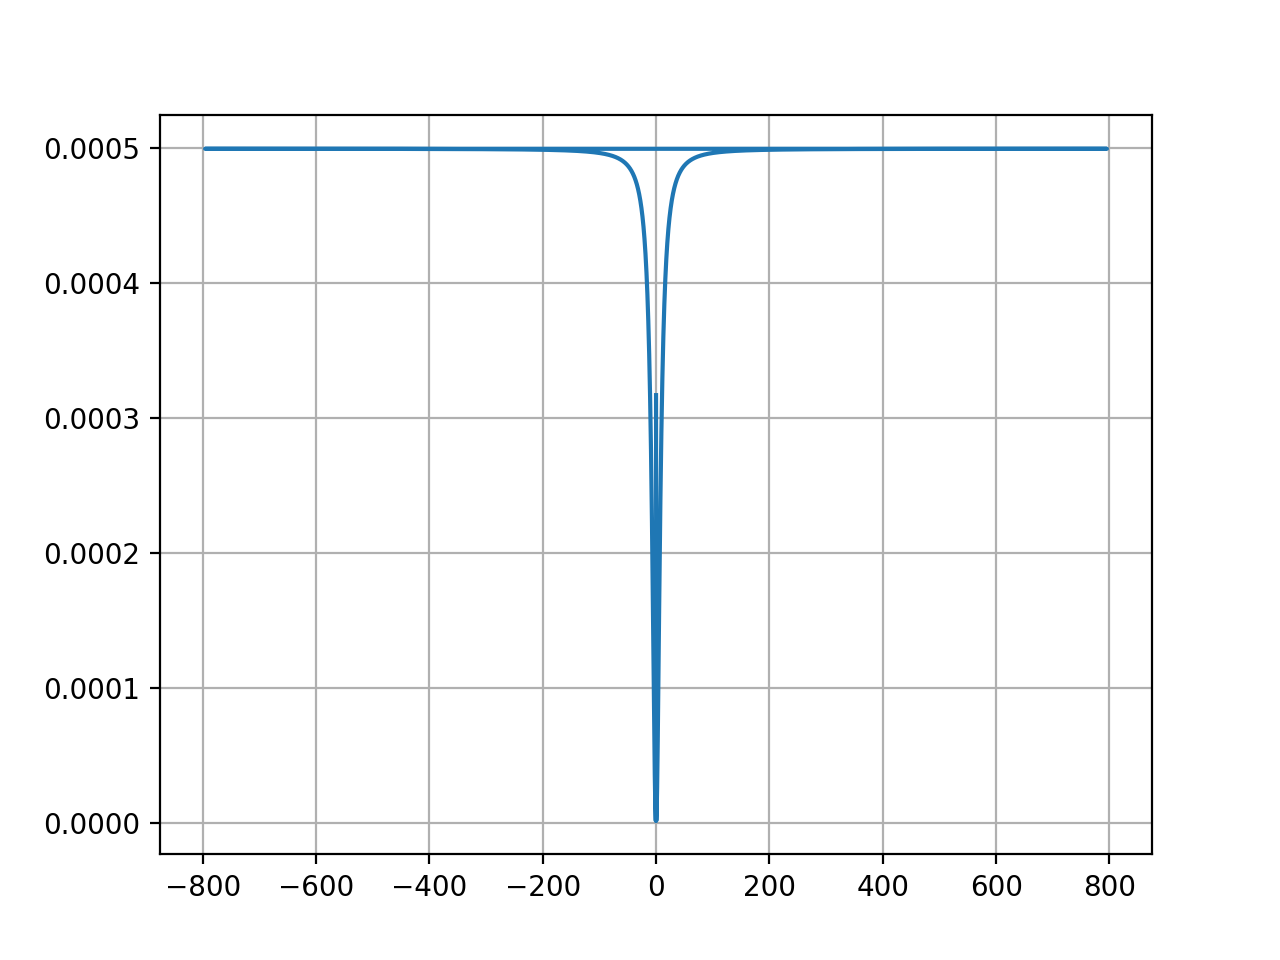

<IPython.core.display.Javascript object>


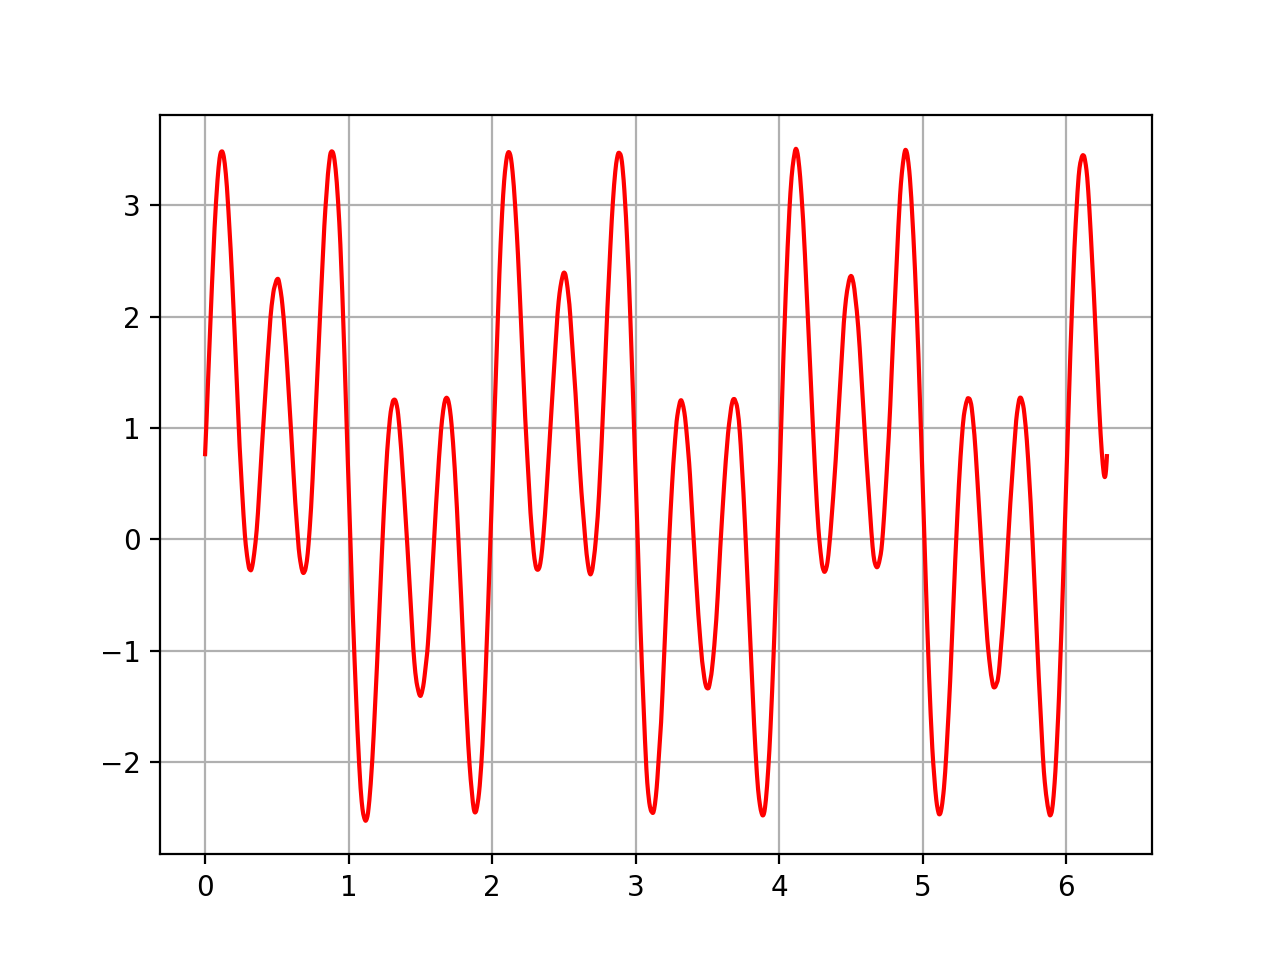

In [4]:
%matplotlib notebook

import numpy as np
from scipy.fftpack import fft, fftfreq, ifft
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_table('ave1/C1--HighPulse-in-100-out1700-an2100--00000.txt', sep="\t", names={'I','II'},
                   dtype = {'I': np.float128, 'II': np.float128}, usecols = [1,0], skiprows=5) 
time = df['I'].tolist()
time = [ time[i]* 1.0e9 for i in range(len(time))]
res = df['II'].tolist()

K = 1000

freq = fftfreq(sig.size,d = t[1]-t[0])

G = H*fft(sig)

weiner = (1/H)*(abs(H)**2)/(abs(H)**2 + K)
sig_final = ifft(weiner*G)

fig = plt.figure()
plt.plot(np.log10(freq),10*np.log10(abs(G)))
plt.plot(np.log10(freq),10*np.log10(abs(H)))

fig = plt.figure()
plt.plot(t,sig)
#plt.plot(t,ifft(G),color='orange')
plt.grid(True)

fig = plt.figure()
plt.plot(freq,H)
plt.grid(True)

fig = plt.figure()
plt.plot(freq,weiner)
plt.grid(True)

'''
fig = plt.figure()
plt.plot(freq,10*np.log10(abs(sigfft)**2))
plt.grid(True)

fig = plt.figure()
plt.plot(freq,np.unwrap(np.angle(sigfft)))
plt.grid(True)
'''

fig = plt.figure()
plt.plot(t,sig_final, color='r') 
plt.grid(True)


In [5]:
1/H

/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: divide by zero encountered in divide
  if __name__ == '__main__':
/reg/g/psdm/sw/conda/inst/miniconda2-prod-rhel7/envs/ana-1.4.2/lib/python2.7/site-packages/ipykernel/__main__.py:1: RuntimeWarning: overflow encountered in divide
  if __name__ == '__main__':


array([ 1.        ,  1.00025323,  1.00101332, ...,  1.00228141,
        1.00101332,  1.00025323])